In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
site_22 = "https://fbref.com/en/comps/Big5/2021-2022/passing/players/2021-2022-Big-5-European-Leagues-Stats"
site_23 = "https://fbref.com/en/comps/Big5/2022-2023/passing/players/2022-2023-Big-5-European-Leagues-Stats"

page_22 = pd.read_html(site_22)
print("22 done")
page_23 = pd.read_html(site_23)
print("23 done")

df_22 = page_22[0]
df_23 = page_23[0]

22 done
23 done


In [3]:
#2022

long_22 = df_22.iloc[:, df_22.columns.get_level_values(0) == 'Long']
short_22 = df_22.iloc[:, df_22.columns.get_level_values(0) == 'Short']
med_22 = df_22.iloc[:, df_22.columns.get_level_values(0) == 'Medium']

long_22.columns = long_22.columns.droplevel(0)
short_22.columns = short_22.columns.droplevel(0)
med_22.columns = med_22.columns.droplevel(0)

long_22 = long_22.rename(columns={"Cmp": "LongCmp22", "Att":"LongAtt22"})
short_22 = short_22.rename(columns={"Cmp": "ShortCmp22", "Att": "ShortAtt22"})
med_22 = med_22.rename(columns={"Cmp": "MedCmp22", "Att": "MedAtt22"})  

long_22 = long_22[['LongCmp22', 'LongAtt22']]
short_22 = short_22[['ShortCmp22', 'ShortAtt22']]
med_22 = med_22[['MedCmp22', 'MedAtt22']]

#2023

long_23 = df_23.iloc[:, df_23.columns.get_level_values(0) == 'Long']
short_23 = df_23.iloc[:, df_23.columns.get_level_values(0) == 'Short']
med_23 = df_23.iloc[:, df_23.columns.get_level_values(0) == 'Medium']

long_23.columns = long_23.columns.droplevel(0)
short_23.columns = short_23.columns.droplevel(0)
med_23.columns = med_23.columns.droplevel(0)

long_23 = long_23.rename(columns={"Cmp": "LongCmp23", "Att":"LongAtt23"})
short_23 = short_23.rename(columns={"Cmp": "ShortCmp23", "Att": "ShortAtt23"})
med_23 = med_23.rename(columns={"Cmp": "MedCmp23", "Att": "MedAtt23"})  

long_23 = long_23[['LongCmp23', 'LongAtt23']]
short_23 = short_23[['ShortCmp23', 'ShortAtt23']]
med_23 = med_23[['MedCmp23', 'MedAtt23']]

In [4]:
# Players 2022

df_22.columns = df_22.columns.droplevel(0)
players_22 = df_22[['Player', 'Pos', 'Squad', '90s']]

# Players 2023

df_23.columns = df_23.columns.droplevel(0)
players_23 = df_23[['Player', 'Squad', '90s']]

In [5]:
season_22 = pd.concat([players_22, short_22, med_22, long_22], axis=1)
season_23 = pd.concat([players_23, short_23, med_23, long_23], axis=1)

In [6]:
df = pd.merge(season_22, season_23, on="Player")
df = df.sort_values(by="Player", ascending=True)

In [7]:
df = df.rename(columns={"Squad_x": "Squad22", "90s_x": "90s22", "Squad_y": "Squad23", "90s_y": "90s23"})

In [8]:
df = df[df['90s22'] != "90s"]

In [9]:
df['Pos'] = df['Pos'].astype("string")
df = df.reset_index(drop=True)

In [10]:
for i in range(len(df)):
    df['Pos'][i] = df['Pos'][i][:2]

In [11]:
df = df.dropna()

In [12]:
df['90s22'] = df['90s22'].astype(float)
df['90s23'] = df['90s23'].astype(float)

df['ShortCmp22'] = df['ShortCmp22'].astype(int)
df['ShortAtt22'] =df['ShortAtt22'].astype(int)
df['MedCmp22'] = df['MedCmp22'].astype(int)
df['MedAtt22'] = df['MedAtt22'].astype(int)
df['LongCmp22'] = df['LongCmp22'].astype(int)
df['LongAtt22'] = df['LongAtt22'].astype(int)

df['ShortCmp23'] = df['ShortCmp23'].astype(int)
df['ShortAtt23'] = df['ShortAtt23'].astype(int)
df['MedCmp23'] = df['MedCmp23'].astype(int)
df['MedAtt23'] = df['MedAtt23'].astype(int)
df['LongCmp23'] = df['LongCmp23'].astype(int)
df['LongAtt23'] = df['LongAtt23'].astype(int)

In [13]:
median_22 = df['90s22'].median()
median_23 = df['90s23'].median()

In [14]:
df = df.loc[df['90s22'] > median_22]
df = df.loc[df['90s23'] > median_23]

In [16]:
df['TotalCmp22'] = df['ShortCmp22'] + df['MedCmp22'] + df['LongCmp22']
df['TotalAtt22'] = df['ShortAtt22'] + df['MedAtt22'] + df['LongAtt22']

df['TotalCmp23'] = df['ShortCmp23'] + df['MedCmp23'] + df['LongCmp23']
df['TotalAtt23'] = df['ShortAtt23'] + df['MedAtt23'] + df['LongAtt23']

In [18]:
df['Other22'] = df['ShortAtt22'] + df['MedAtt22']
df['Other23'] = df['ShortAtt23'] + df['MedAtt23']

df_diffs = df[['Player', 'Pos', 'Squad22', 'Squad23', 'Other22', 'LongAtt22', 'TotalAtt22', 'Other23', 'LongAtt23', 'TotalAtt23']]

In [19]:
df_diffs.tail(100)

,Player,Pos,Squad22,Squad23,Other22,LongAtt22,TotalAtt22,Other23,LongAtt23,TotalAtt23
1643,Serge Gnabry,FW,Bayern Munich,Bayern Munich,1162,91,1253,352,29,381
1644,Sergej Milinković-Savić,MF,Lazio,Lazio,1938,233,2171,601,100,701
1646,Sergi Darder,MF,Espanyol,Espanyol,1350,276,1626,448,165,613
1648,Sergi Gómez,DF,Espanyol,Espanyol,1094,246,1340,350,99,449
1651,Sergio Busquets,MF,Barcelona,Barcelona,2277,355,2632,583,78,661
...,...,...,...,...,...,...,...,...,...,...
1897,Óscar Valentín,MF,Rayo Vallecano,Rayo Vallecano,1050,200,1250,385,73,458
1898,Óscar de Marcos,DF,Athletic Club,Athletic Club,940,118,1058,617,86,703
1899,İlkay Gündoğan,MF,Manchester City,Manchester City,1104,151,1255,500,56,556
1900,Łukasz Fabiański,GK,West Ham,West Ham,385,622,1007,185,220,405


In [20]:
df_diffs['LongPerc22'] = round(df_diffs['LongAtt22'] / df_diffs['TotalAtt22'], 3)
df_diffs['OtherPerc22'] = round(df_diffs['Other22'] / df_diffs['TotalAtt22'], 3)

df_diffs['LongPerc23'] = round(df_diffs['LongAtt23'] / df_diffs['TotalAtt23'], 3)
df_diffs['OtherPerc23'] = round(df_diffs['Other23'] / df_diffs['TotalAtt23'], 3)

df_diffs['LongDiff'] = df_diffs['LongPerc23'] - df_diffs['LongPerc22'] 
df_diffs['OtherDiff'] = df_diffs['OtherPerc23'] - df_diffs['OtherPerc22']

In [21]:
df_top_diff = df_diffs.sort_values(by="LongDiff")

df_gk = df_top_diff.loc[df_top_diff['Pos'] == "GK"]
df_gk = df_gk.head(5)

df_df = df_top_diff.loc[df_top_diff['Pos'] == "DF"]
df_df = df_df.head(5)

df_mf = df_top_diff.loc[df_top_diff['Pos'] == "MF"]
df_mf = df_mf.head(5)

df_fw = df_top_diff.loc[df_top_diff['Pos'] == "FW"]
df_fw = df_fw.head(5)

In [22]:
df_top_five_each = pd.concat([df_gk, df_df, df_mf, df_fw])
df_top_five_each.sample(5)

,Player,Pos,Squad22,Squad23,Other22,LongAtt22,TotalAtt22,Other23,LongAtt23,TotalAtt23,LongPerc22,OtherPerc22,LongPerc23,OtherPerc23,LongDiff,OtherDiff
851,Jonathan Clauss,DF,Lens,Marseille,1362,399,1761,505,52,557,0.227,0.773,0.093,0.907,-0.134,0.134
597,Gauthier Gallon,GK,Troyes,Troyes,478,573,1051,195,136,331,0.545,0.455,0.411,0.589,-0.134,0.134
216,Benjamin Bourigeaud,FW,Rennes,Rennes,1385,430,1815,581,121,702,0.237,0.763,0.172,0.828,-0.065,0.065
98,Amine Gouiri,FW,Nice,Rennes,815,127,942,182,13,195,0.135,0.865,0.067,0.933,-0.068,0.068
1878,Álvaro García,FW,Rayo Vallecano,Rayo Vallecano,770,164,934,280,38,318,0.176,0.824,0.119,0.881,-0.057,0.057


In [23]:
df_top_five_each = df_top_five_each.sort_values(by="LongDiff")
df_top_five_each = df_top_five_each[['Player', 'Pos', 'Squad22', 'Squad23', 'LongDiff']]
df_top_five_each['LongDiff'] = abs(df_top_five_each['LongDiff'])

df_top_five_each = df_top_five_each.reset_index()

In [24]:
df_top_five_each['LongDiff'] = df_top_five_each['LongDiff'] * 100

In [25]:
df_top_five_each['Squad22'] = df_top_five_each['Squad22'].astype("string")
df_top_five_each['Squad23'] = df_top_five_each['Squad23'].astype("string")

In [40]:
for i in range(len(df_top_five_each)):
    df_top_five_each['SquadCode'] = df_top_five_each['Squad22'][i][:3] + "/" + df_top_five_each['Squad23'][i][:3]

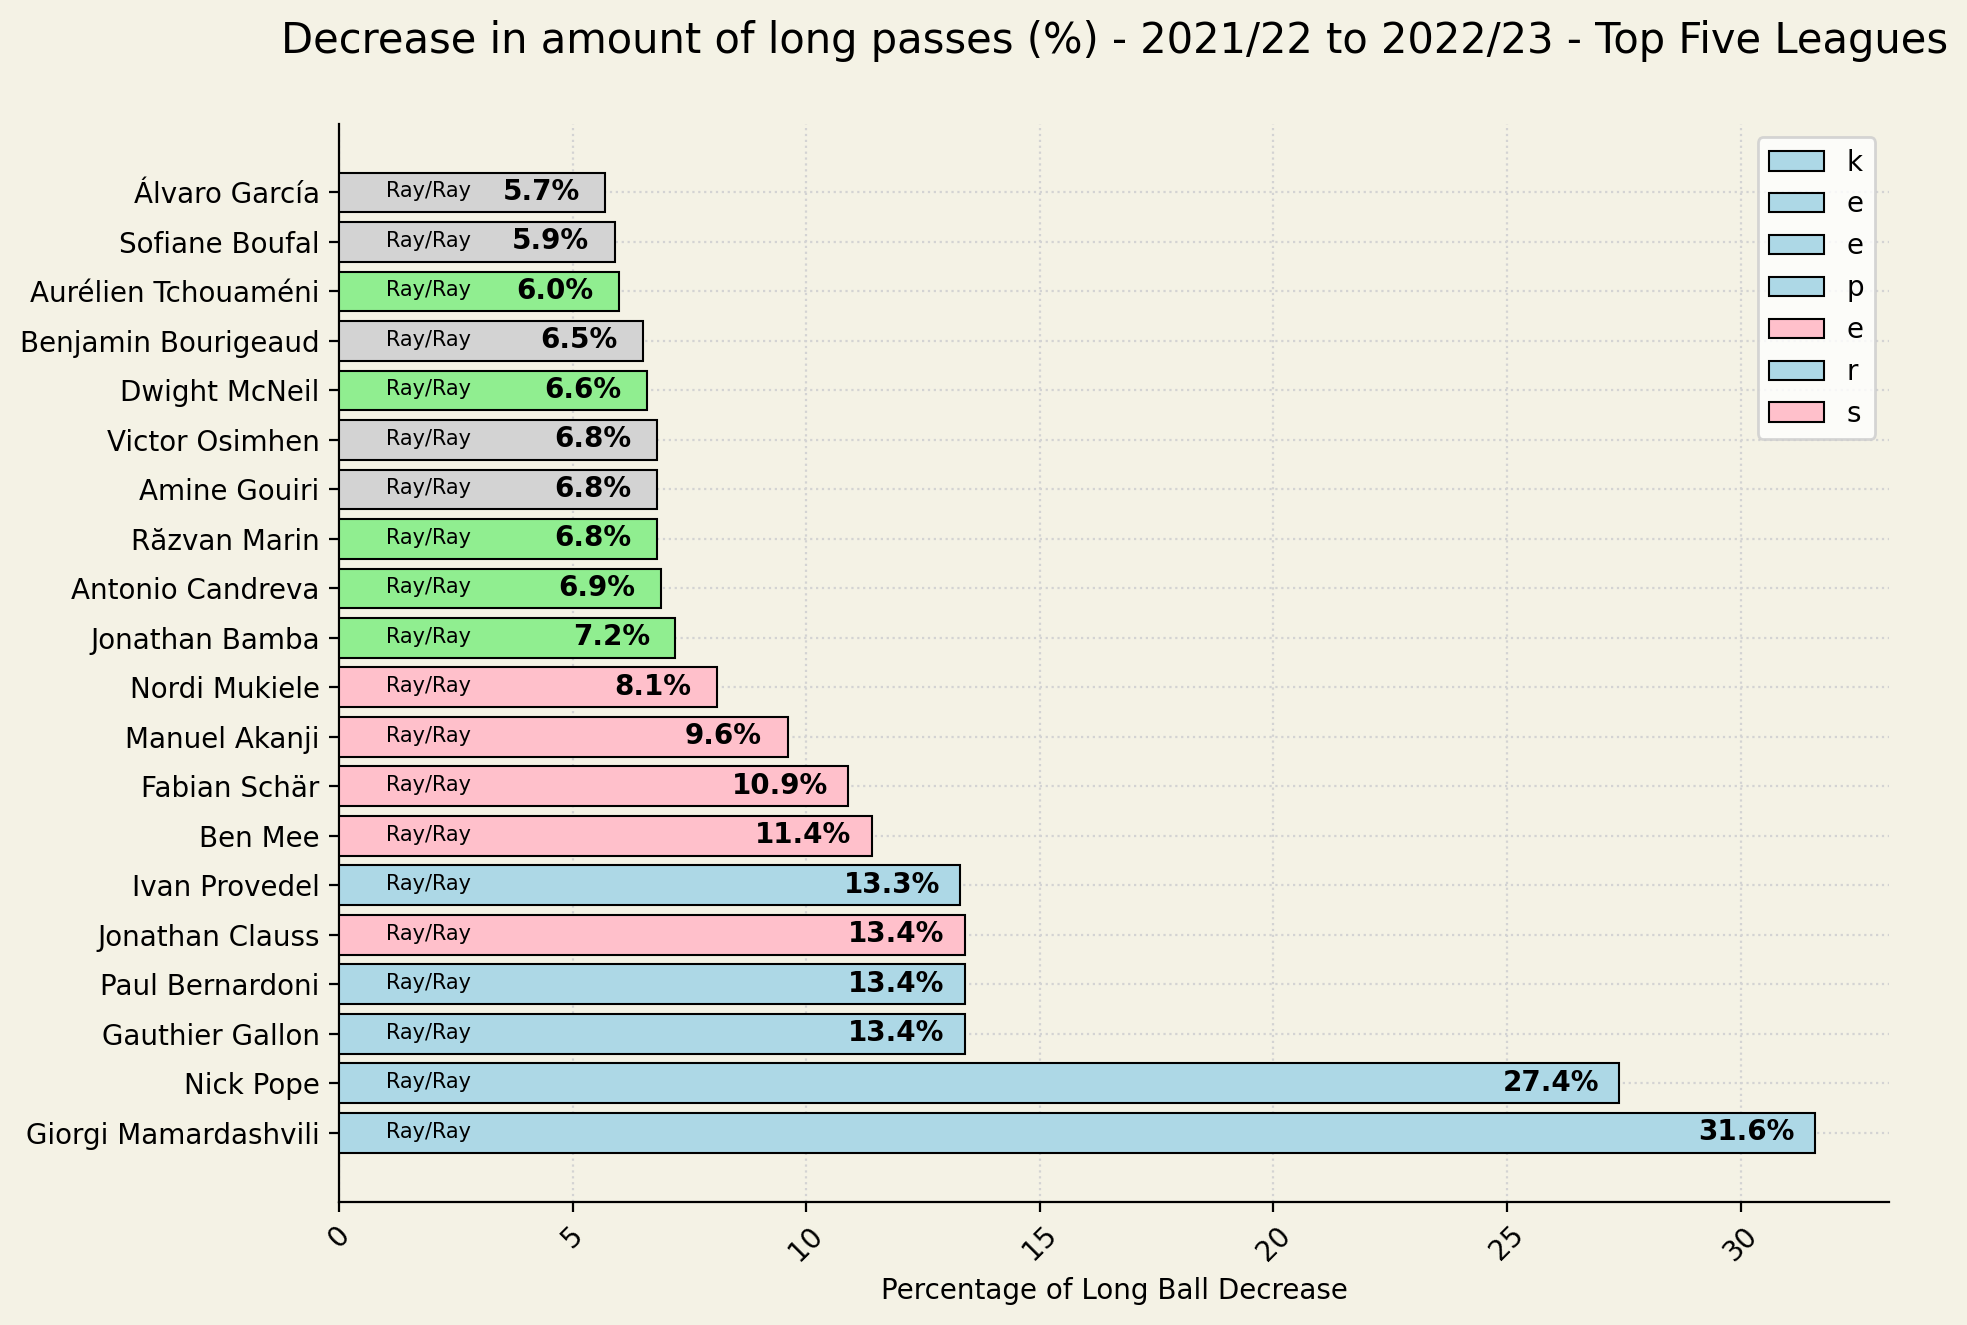

In [47]:
fig = plt.figure(figsize = (10,7), dpi = 200, facecolor = '#f4f2e5')

ax = plt.subplot(111)
ax.set_facecolor("#f4f2e5")

ax.spines["top"].set(visible=False)
ax.spines["right"].set(visible=False)

ax.grid(True, color="lightgrey", ls=":")
ax.set_xlabel("Percentage of Long Ball Decrease")
ax.set_title("Decrease in amount of long passes (%) - 2021/22 to 2022/23 - Top Five Leagues", fontsize=15, y=1.05)

for i, v in enumerate(df_top_five_each['LongDiff']):
    if v > 10:
        ax.text(v - 2.5, i - 0.15, str(round(v, 2)) + "%", color = 'black', fontweight="bold", zorder=5)
    else:
        ax.text(v - 2.2, i - 0.15, str(round(v, 2)) + "%", color = 'black', fontweight="bold", zorder=5)
    
for i in range(len(df_top_five_each)):
    if df_top_five_each['Pos'][i] == "GK":
        ax.barh(df_top_five_each['Player'][i], df_top_five_each['LongDiff'][i], ec="black", lw = .75, zorder=3, color="lightblue", label="Keeper")
    elif df_top_five_each['Pos'][i] == "DF":
        ax.barh(df_top_five_each['Player'][i], df_top_five_each['LongDiff'][i], ec="black", lw = .75, zorder=3, color="pink", label="Defender")
    elif df_top_five_each['Pos'][i] == "MF":
        ax.barh(df_top_five_each['Player'][i], df_top_five_each['LongDiff'][i], ec="black", lw = .75, zorder=3, color="lightgreen", label="Midfielder")
    else:
        ax.barh(df_top_five_each['Player'][i], df_top_five_each['LongDiff'][i], ec="black", lw = .75, zorder=3, color="lightgrey", label="Forward")
        
for i in range(len(df_top_five_each)):
    ax.text(1, i - 0.1, df_top_five_each['SquadCode'][i], fontsize=7.5)
    
ax.tick_params(axis="x", rotation = 45)

ax.legend("Keepers", "Defenders", "Midfielders" ,)

plt.show()